In [89]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn import svm
import math

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
x = x[:, [1,3]]
y[y == 0] = -1
x = x[0:np.where(y == 2)[0][0]]
y = np.delete(y, np.where(y == 2))


In [26]:
#7a
def label_return(w,b,x):
    num = np.dot(w,x) + b
    return np.sign(num)

def perceptron(data, labels):
    np.random.seed(42)
    shuffled = np.random.choice(100, len(data), replace = False)
    data = data[shuffled]
    labels = labels[shuffled]
    w = np.zeros(len(data[0]))
    b = 0
    while True:
        predicted = []
        for i in range(len(labels)):
            xi = data[i]
            yi = labels[i]
            predict = label_return(w,b,xi)
            predicted.append(np.sign(yi * (np.dot(w,xi)+b)))
            if predict != yi:
                w = w + (yi*xi)
                b = b + yi
        print([w,b])
        if sum(predicted) == len(predicted):
            break



    return [w,b]
    

In [27]:
perceptron(x,y)

[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]


[array([-0.3,  1.3]), 0]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


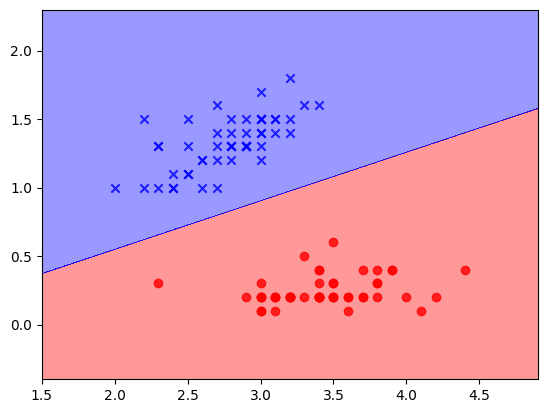

In [20]:
#7c
classifier = Perceptron()
classifier.fit(x, y)
def plot_decision_regions(x, y):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()

plot_decision_regions(x,y)


[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]
[array([-0.3,  1.3]), 0]


(array([ 0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

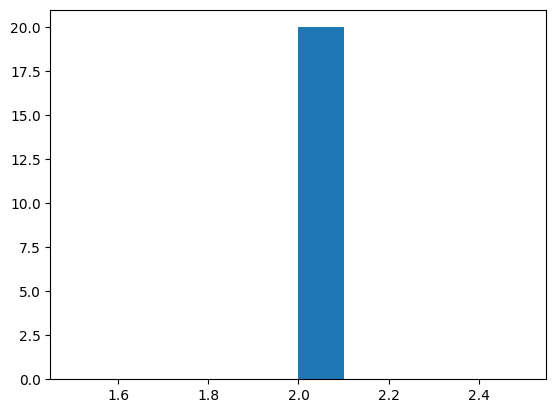

In [37]:
#7d
def perceptron7d(data, labels):
    np.random.seed(42)
    shuffled = np.random.choice(100, len(data), replace = False)
    data = data[shuffled]
    labels = labels[shuffled]
    w = np.zeros(len(data[0]))
    b = 0
    updates = []
    while True:
        predicted = []
        errors = 0
        for i in range(len(labels)):
            xi = data[i]
            yi = labels[i]
            predict = label_return(w,b,xi)
            predicted.append(np.sign(yi * (np.dot(w,xi)+b)))
            if predict != yi:
                w = w + (yi*xi)
                b = b + yi
                errors = errors + 1
        print([w,b])
        updates.append(errors)
        if sum(predicted) == len(predicted):
            break



    return sum(updates)

updates_list = []    
for j in list(range(20)):
    updates_list.append(perceptron7d(x, y))
plt.hist(updates_list)

In [140]:
#8
x = iris.data
y = iris.target
x = x[:, [0,2]]
x = x[np.where(y != 0)]
y = y[np.where(y != 0)]
x

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1],
       [6.3, 6. ],
       [5.8, 5.1],
       [7.1,

In [128]:
#8a
clf = svm.SVC(kernel='linear', C = math.exp(10))
clf.fit(x, y)
pred = clf.predict(x)
clf.coef_

#yes linear separable


array([[-2.1029357 ,  7.78514601]])

In [129]:
#8b
c_val = [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]
error = []
sv = []
for i in c_val:
    clf = svm.SVC(kernel='linear', C = i)
    error.append(1-clf.fit(x, y).score(x,y))
    sv.append(len(clf.support_vectors_))
res = pd.DataFrame()
res['C'] = c_val
res['training error'] = error
res['# of Support Vectors'] = sv
res

,C,training error,# of Support Vectors
0,0.001,0.17,100
1,0.010,0.16,92
2,0.100,0.07,56
3,1.000,0.07,31
4,10.000,0.05,18
5,100.000,0.05,14
6,1000.000,0.05,14
7,10000.000,0.05,14
8,100000.000,0.06,14
9,1000000.000,0.07,13


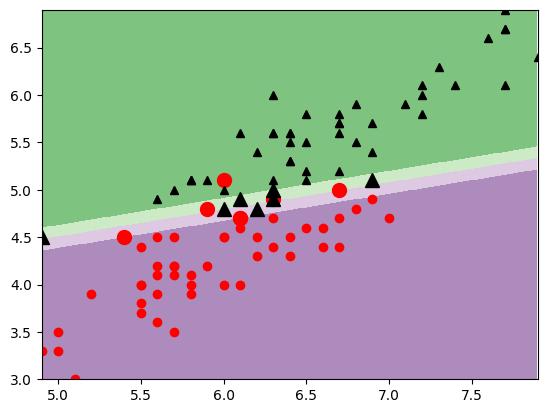

In [142]:
#8c 
C = 100
clf = svm.SVC(kernel='linear', C = 100).fit(x,y)
sv = np.zeros(100,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)

delta = 0.005
x_min, x_max = min(x[:,0]), max(x[:,0])
y_min, y_max = min(x[:,1]), max(x[:,1])
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
plt.plot(x[(y==2)*notsv,0], x[(y==2)*notsv,1], 'k^')
plt.plot(x[(y==2)*sv,0], x[(y==2)*sv,1], 'k^', markersize=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8,
       7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8,
       6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1,
       6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7,
       6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [135]:
x[:,1]

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1,
       5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1,
       5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9,
       5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6,
       5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])